In [ ]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Colab_Notebooks
%ls

# Fundamentos de física de dispositivos electrónicos


Se puede transmitir una comprensión física de cómo funcionan los dispositivos semiconductores sin profundizar demasiado en la física de los semiconductores, pero es necesaria una comprensión básica de algunos conceptos clave a nivel de un curso de introducción a la física del estado sólido o dispositivos semiconductores. Esta seccion resumirá algunos conceptos esenciales. 


## De los niveles de energía a las bandas de energía

### Niveles de energía discretos y estructura atómica

La solucion de la ecuación de Schrödinger describe los niveles de energía de un atomó en el que no se tiene en cuuenta la interacción entre electrones. Tiene la siguiente forma:
$$
E \psi=-\frac{\hbar^{2}}{2 \mu} \nabla^{2} \psi-\frac{Z q^{2}}{4 \pi \varepsilon_{0} r} \psi
$$
Dond $q$ es la carga del electrón, $e r$ es la posicion del electrón relativa al nucleo, $|\vec r|= r$ s la distancia al nuucleo, $Z$ es la carga del nuecleo $\varepsilon_{0}$ es la permitividad del vacio y finalmente
$$
\mu=\frac{m_{q} m_{p}}{m_{q}+m_{p}},
$$
es la masa reducida del electrón, siendo $m_{p}$ la masa del protón y $m_{q}$ la masa del electrón.
Típicamente esta ecuación se resuelve planteado una separación de variables como siguue:
$$
\psi(r, \theta, \varphi)=R(r) Y_{\ell}^{m}(\theta, \varphi)=R(r) \Theta(\theta) \Phi(\varphi)
$$
Donde $R$ es la función radial y $Y_{\ell}^{m}$ son los esféricos armónicos dee grado $\ell$ y orden $m$. El caso $Z=1$ s el único cuya solución analítica exacta se conoce: 
$$
\psi_{n \ell m}(r, \theta, \varphi)=\sqrt{\left(\frac{2}{n a_{0}}\right)^{3} \frac{(n-\ell-1) !}{2 n[(n+t) !]}} e^{-r / n a_{0}}\left(\frac{2 r}{n a_{0}}\right)^{\ell} L_{n-\ell-1}^{2 \ell+1}\left(\frac{2 r}{n a_{0}}\right) \cdot Y_{\ell}^{m}(\theta, \varphi)
$$
Donde se ha definido el rádio de Bohr,
$$
a_{0}=\frac{4 \pi \varepsilon_{0} \hbar^{2}}{m_{q} q^{2}} \approx 0.52 \unicode{x212B}
$$
Los polinómios ganaralizados de Laguerre, $L_{n-\ell-1}^{2 \ell+1}(\cdots)$, y los númueros cuánticos principal, $n$, azimutal, $\ell$, y magnético, $m$. los números cuánticos toman valores que satisfacen las siguientes condiciones:
$$
\begin{array}{l}
n=1,2,3, \ldots \\
\ell=0,1,2, \ldots, n-1 \\
m=-\ell, \ldots, \ell
\end{array}
$$
La strcutura de capas de un átomo se origina por el número cuántico $\ell$ y a cada capa se le asigna una letra según el valor de $\ell$:

$\ell$ | Letra      | # orbitales
--|:---------:|:-----------:
0|S      | 1
1|P   | 3
2|D   | 5
3|F   | 7
4|G   | 9
5|H   | 11
6|I   | 13

Cada orbital puede acomodar bien sea dos electrones (uno con espin $\uparrow$ y otro con espin $\downarrow$), o un espin (con espin $\uparrow$ o $\downarrow$), o ninguno.

#### Como lucen los orbitales?

En este dominio, generalmente se definen incluyendo un factor de $ (- 1) ^ m $ (la convención de fase de Condon-Shortley):
$$
Y_{l}^{m}(\theta, \varphi)=(-1)^{m} \sqrt{\frac{(2 l+1)}{4 \pi} \frac{(l-m) !}{(l+m) !}} P_{lm}(\cos \theta) e^{i m \varphi}
$$
donde $ P_{lm}(\cos \theta) $ es un polinomio de Legendre asociado (sin el factor de $ (- 1) ^ m $).

Dado que $Y_{l}^{m}(\theta, \varphi)$ son funciones complejas de ángulo, a menudo se considera más conveniente usar sus formas reales para su representación en figuras y en algunos cálculos. Una base real adecuada de armónicos esféricos puede definirse como:
$$
Y_{l m}=\left\{\begin{array}{ll}
\sqrt{2}(-1)^{m} \operatorname{Im}\left[Y_{l}^{|m|}\right] & \text { if } m<0 \\
Y_{l}^{0} & \text { if } m=0 \\
\sqrt{2}(-1)^{m} \operatorname{Re}\left[Y_{l}^{m}\right] & \text { if } m>0
\end{array}\right.
$$
El siguiente código utiliza la rutina special.sph_harm de SciPy para calcular los armónicos esféricos, que luego se convierten en estas funciones reales y se muestran en un diagrama de Matplotlib tridimensional. 

In [ ]:
# dependences for ploting solid harmonics
!dpkg --configure -a
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng
%matplotlib inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# The following import configures Matplotlib for 3D plotting.
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm
plt.rc('text', usetex=True)

# Grids of polar and azimuthal angles
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2*np.pi, 100)
# Create a 2-D meshgrid of (theta, phi) angles.
theta, phi = np.meshgrid(theta, phi)
# Calculate the Cartesian coordinates of each point in the mesh.
xyz = np.array([np.sin(theta) * np.sin(phi),
                np.sin(theta) * np.cos(phi),
                np.cos(theta)])

def plot_Y(ax, el, m):
    """Plot the spherical harmonic of degree el and order m on Axes ax."""

    # NB In SciPy's sph_harm function the azimuthal coordinate, theta,
    # comes before the polar coordinate, phi.
    Y = sph_harm(abs(m), el, phi, theta)

    # Linear combination of Y_l,m and Y_l,-m to create the real form.
    if m < 0:
        Y = np.sqrt(2) * (-1)**m * Y.imag
    elif m > 0:
        Y = np.sqrt(2) * (-1)**m * Y.real
    Yx, Yy, Yz = np.abs(Y) * xyz

    # Colour the plotted surface according to the sign of Y.
    cmap = plt.cm.ScalarMappable(cmap=plt.get_cmap('YlGn'))
    cmap.set_clim(-0.5, 0.5)

    ax.plot_surface(Yx, Yy, Yz,
                    facecolors=cmap.to_rgba(Y.real),
                    rstride=2, cstride=2)

    # Draw a set of x, y, z axes for reference.
    ax_lim = 0.5
    ax.plot([-ax_lim, ax_lim], [0,0], [0,0], c='0.5', lw=1, zorder=10)
    ax.plot([0,0], [-ax_lim, ax_lim], [0,0], c='0.5', lw=1, zorder=10)
    ax.plot([0,0], [0,0], [-ax_lim, ax_lim], c='0.5', lw=1, zorder=10)
    # Set the Axes limits and title, turn off the Axes frame.
    ax.set_title(r'$Y_{{{},{}}}$'.format(el, m))
    ax_lim = 0.5
    ax.set_xlim(-ax_lim, ax_lim)
    ax.set_ylim(-ax_lim, ax_lim)
    ax.set_zlim(-ax_lim, ax_lim)
    ax.axis('off')

fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(projection='3d')
l, m = 3, 0
plot_Y(ax, l, m)
plt.savefig('Y{}_{}.png'.format(l, m))
plt.show()

To plot a family of shell:

In [ ]:
el_max = 5
figsize_px, DPI = 800, 100
figsize_in = figsize_px / DPI
fig = plt.figure(figsize=(figsize_in, figsize_in), dpi=DPI)
spec = gridspec.GridSpec(ncols=2*el_max+1, nrows=el_max+1, figure=fig)
for el in range(el_max+1):
    for m_el in range(-el, el+1):
        print(el, m_el)
        ax = fig.add_subplot(spec[el, m_el+el_max], projection='3d')
        plot_Y(ax, el, m_el)
plt.tight_layout()
#plt.savefig('sph_harm.png')
plt.show()

#### Cual es la nergía por orbital?

Se puede utilizar el paquete Symbolic Python (SymPy) para obtener las soluciones aproximadas para atomos hidrogenoides.

In [ ]:
from __future__ import division
from sympy import  symbols
n,l,m,Z = symbols('n l m Z')
from sympy.physics.hydrogen import E_nl, R_nl,Psi_nlm

In [ ]:
help(Psi_nlm)

In [ ]:
help(E_nl)

In [ ]:
from sympy.abc import n, Z
E_nl(1, 1)*13.6

In [ ]:
help(R_nl)

### Varios niveles de energía agrupados forman bandas de energía 

Nos concentraresmos en el caso del átomo de silicio. El silicio tiene un número atómico de 14; tiene 14 electrones cuyo negativo
 las cargas están equilibradas por las cargas positivas de 14 protones en el
 núcleo. Aprendemos en química de primer año que estos catorce electrones
 ocupan varios niveles de energía asociados con los orbitales moleculares. los
 El nivel de energía más bajo es el orbital $ n  = 1s$, que puede acomodar dos
 electrones (uno con espín $\uparrow$ y el otro con espín $\downarrow$). El siguiente nivel de energía es el orbital  $n = 2S$, que puede acomodar dos
 electrones (uno con espín $\uparrow$ y el otro con espín $\uparrow$), Luego los tres orbitales $n= 2p$ $p_x$, $p_y$ y $p_z$. Cada uno de los tres orbitales $p$ puede acomodar dos electrones (uno con espín $\uparrow$ y el otro con espín $\downarrow$) seis electrones en total.
 Los siguientes son los orbitales $n=3s$ que puede acomodar dos electrones (uno con espín $\uparrow$ y el otro con espín $\downarrow$),   y $n=3p$ que acomoda los dos electrones restantes, estos se acomodan de tal manera los dos espines bien sea $\uparrow$ o $\downarrow$ quedan en orbitales separados, estos cuatro electrones se denominan electrones de valencia.
La configuración orbital para Si es $1 s^{2} 2 s^{2} 2 p^{6} 3 s^{2} 3 p^{2}$.

Por otra parte para el nivel $n=3$ se tienen las capas $3s$ y $3p$ que ofrecen ocho estados para comodar electrones y salvo los cuatro orbitales ocupados por los electrones de valencia que son responsables del enlace químico,  nos quedan cuatro orbitales más y al modificar la población de estos orbitales de diferentes formas se pueden  generar diferentes dispositivos electrónicos.

El semiconductor utilizado para la mayoría de los dispositivos semiconductores, como los transistores, es el silicio, y la mayoría de los transistores de silicio están fabricados con silicio monocristalino de alta calidad en el que cada átomo de silicio se une covalentemente con los cuatro vecinos más cercanos en la llamada estructura reticular de diamante. La densidad de los átomos de Si es aproximadamente $N_A = 5 × 10^{22} cm^{−3}$, y el espaciado vecino más cercano es $0.235 nm$. Dado que había ocho estados de electrones de valencia con 4 de ellos ocupados para cada átomo de Si, esperamos encontrar $8 \times N_A$ estados de valencia en el cristal con $4\times N_A$ de ellos ocupados. Eso es lo que sucede, pero la interacción cuántica de los electrones desplaza las energías y las amplía. La mitad de los estados disminuyen en energía y se convierten en los "estados de enlace" responsables de los enlaces covalentes en la red de Si, y la otra mitad de los estados (los estados anti-enlace) aumentan en energía.

Los niveles de energía de electrones llenos de 4NA se convierten en estados ocupados por $4\times N_A$ en un rango de energías llamado banda de valencia (como se muestra en la figura de abajo). Los estados desocupados $4\times N_A$ se convierten en una banda de estados desocupados conocida como banda de conducción (como se muestra en la figura de abajo). En la figura de abajo, la parte superior de la banda de valencia está separada de la parte inferior de la banda de conducción por una "brecha de energía" (o banda prohibida), que es aproximadamente $1.12 eV$ para Si. En $T = 0K$, todos los estados $4\times N_A$ en la banda de valencia están ocupados y todos los estados $4\times N_A$ en la banda de conducción están vacíos.
A una temperatura finita, la red de Si vibra y tiene una energía térmica promedio de $3k_B T / 2$, donde $k_B$ es la constante de Boltzman. A temperatura ambiente, $T = 300 K$, $k_B T = 0.026 eV$, que es aproximadamente $40$ veces más pequeño que el intervalo de banda del Si. En promedio, no hay suficiente energía térmica disponible para romper los enlaces covalentes y promover electrones de la banda de valencia a la banda de conducción, pero existe una pequeña probabilidad de excitar térmicamente un electrón de la banda de valencia a la banda de conducción. Como se muestra en la figura de abajo, esto significa que habrá una pequeña probabilidad de estados vacíos (llamados huecos) en la valencia y una pequeña probabilidad de estados llenos cerca de la parte inferior de la banda de conducción. La densidad de electrones en la banda de conducción es igual a la densidad de los huecos en la banda de valencia y se conoce como la *concentración de portador intrínseco*, $n_i$. Para el silicio a temperatura ambiente, $ni \approx 10^{10} cm ^{− 3 }$.
 
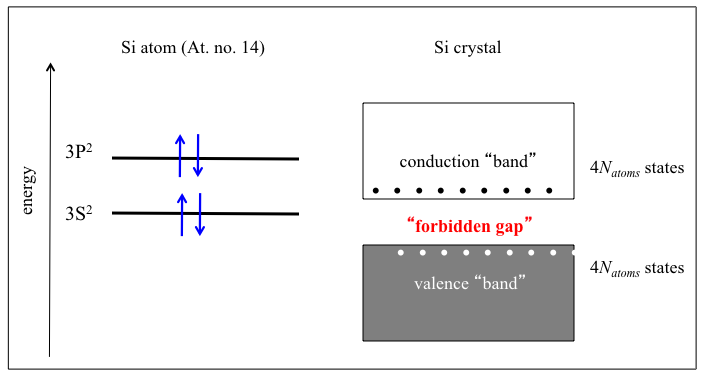

Un MOSFET de Si (uno de los dispositivos semiconductores más importantes) consta de un electrodo de compuerta metálico y contactos de fuente y drenaje, un aislante de compuerta de $SiO_2$ y el sustrato de Si. La figura de abajo ilustra las diferencias entre las bandas de energía de estos materiales. En un aislante, la banda de valencia está llena de electrones, pero la banda prohibida es muy grande, por lo que prácticamente no hay probabilidad de promover un electrón de la banda de valencia a la banda de conducción, por lo que no existen huecos en la banda de valencia ni electrones en la banda de conducción. Un metal es diferente porque los estados de los electrones se llenan hasta la mitad de una banda. Los metales conducen muy bien la electricidad y los aislantes tienen una conductividad insignificante. En un semiconductor, podemos cambiar el número de huecos en la banda de valencia y electrones en la banda de conducción variando la temperatura o introduciendo una pequeña concentración de dopantes en la red de Si. Se puede hacer que la conductividad de un semiconductor varíe en muchos órdenes de magnitud, desde casi metálico hasta casi aislante, que es lo que
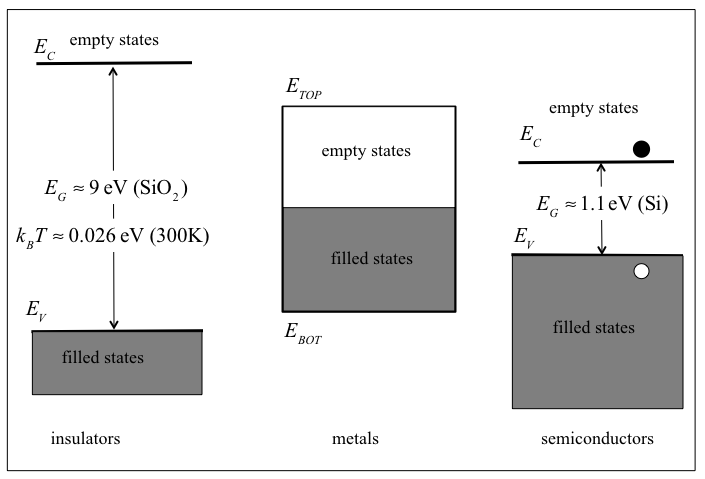

### El dopaje y la densidad de portadores

Lo que hace que los semiconductores sean tan útiles en la fabricación de dispositivos electrónicos es el hecho de que en un semiconductor es posible cambiar fácilmente las densidades de los huecos en la banda de valencia y los electrones en la banda de conducción. Dicho de otra manera, se puede colocar el nivel de Fermi desde cerca de la parte superior de la banda de valencia hasta cerca de la parte inferior de la banda de conducción o en cualquier punto intermedio. Una forma de hacerlo es dopando el semiconductor. (Otra forma es usar una compuerta para cambiar el potencial electrostático dentro del semiconductor, en argot más tecnico *gating*.) La figura de abajo ilustra cómo dopar un semiconductor sustituyendo átomos de Si por una pequeña concentración de átomos dopantes. El diagrama bidimensional pretende ilustrar el enlace tridimensional en el que cada átomo de Si forma enlaces químicos con cuatro vecinos más cercanos. Si un átomo de Si (en la columna IV de la tabla periódica con cuatro electrones de valencia) es reemplazado por un elemento como fósforo o arsénico de la columna V con cinco electrones de valencia, entonces el dopante forma enlaces covalentes con los cuatro vecinos de silicio, pero el quinto electrón de valencia está débilmente ligado. La pequeña cantidad de energía térmica disponible a temperatura ambiente puede romper este enlace débil y promover el electrón a la banda de conducción de Si dejando atrás un átomo dopante cargado positivamente porque ha perdido un electrón.
La figura d abajo también muestra lo que sucede cuando un dopante de la columna III de la tabla periódica (por ejemplo, boro) se sustituye por un átomo de Si. En este caso, el dopante tiene tres electrones de valencia, por lo que puede formar enlaces covalentes con tres de los cuatro vecinos. Solo se necesita un poco de energía térmica para remover un electrón de un enlace Si$:$Si y colocarlo en el sitio dopante y llenar el enlace covalente faltante. El dopante ahora tiene carga negativa porque tiene un electrón extra, pero nos falta un enlace Si$:$Si, por lo que hemos creado un hueco en la banda de valencia. Al introducir pequeñas cantidades de impurezas de la columna V o de la columna III en la red de Si, podemos controlar la cantidad de electrones en la banda de conducción y los huecos en la banda de valencia.
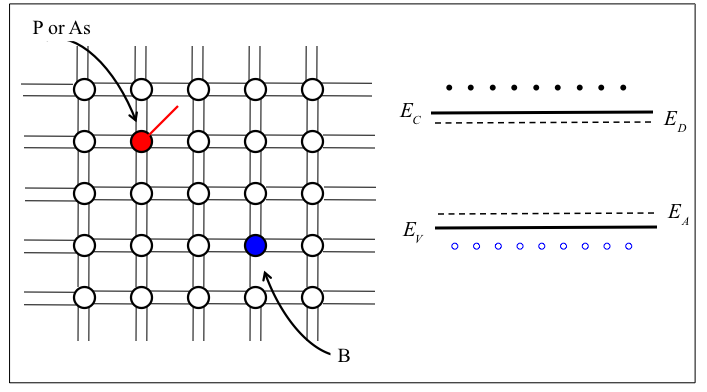

La concentración de electrones y huecos en un semiconductor está determinada por la densidad de los dopantes. Suponga que tenemos una concentración de donantes de columna V que es igual a $N_D cm^ {−3}$ y una concentración de aceptores de columna III que es igual a $N_A cm^{−3}$. Suponga también que la energía térmica es suficiente para ionizar estos dopantes, de modo que la concentración de dopantes ionizados es $N_D^+ = N_D$ y $N_A^− = N_A$. Para un semiconductor intrínseco, la concentración de electrones en la banda de conducción y los huecos en la banda de valencia es $n_0= p_0 = n_i$. Estas concentraciones se pueden cambiar dopando el semiconductor.
La carga neta en el semiconductor es:
$$
\rho=q\left(p_{0}-n_{0}+N_{D}-N_{A}\right) \quad \mathrm{C} / \mathrm{cm}^{3}
$$
Debido a que los electrones y el agujero son móviles (los átomos dopantes están fijos en la red y no pueden moverse), se moverán para cancelar la carga neta y hacer que el semiconductor sea neutral.
$$
\rho=q\left(p_{0}-n_{0}+N_{D}-N_{A}\right)=0
$$